In [3]:
# fashion_pose.py : MPII를 사용한 신체부위 검출
import cv2

# MPII에서 각 파트 번호, 선으로 연결될 POSE_PAIRS
BODY_PARTS = { "Head": 0, "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4,
                "LShoulder": 5, "LElbow": 6, "LWrist": 7, "RHip": 8, "RKnee": 9,
                "RAnkle": 10, "LHip": 11, "LKnee": 12, "LAnkle": 13, "Chest": 14,
                "Background": 15 }

POSE_PAIRS = [ ["Head", "Neck"], ["Neck", "RShoulder"], ["RShoulder", "RElbow"],
                ["RElbow", "RWrist"], ["Neck", "LShoulder"], ["LShoulder", "LElbow"],
                ["LElbow", "LWrist"], ["Neck", "Chest"], ["Chest", "RHip"], ["RHip", "RKnee"],
                ["RKnee", "RAnkle"], ["Chest", "LHip"], ["LHip", "LKnee"], ["LKnee", "LAnkle"] ]

In [4]:
# 각 파일 path
protoFile = "pose_deploy_linevec_faster_4_stages.prototxt"
weightsFile = "pose_iter_160000.caffemodel"

In [5]:
# 위의 path에 있는 network 불러오기
net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)

In [14]:
# 이미지 읽어오기
image = cv2.imread("sample_images\DeGrom.png")

In [15]:
# frame.shape = 불러온 이미지에서 height, width, color 받아옴
imageHeight, imageWidth, _ = image.shape

In [16]:
# network에 넣기위해 전처리
inpBlob = cv2.dnn.blobFromImage(image, 1.0 / 255, (imageWidth, imageHeight), (0, 0, 0), swapRB=False, crop=False)
 
# network에 넣어주기
net.setInput(inpBlob)

# 결과 받아오기
output = net.forward()

In [17]:
# output.shape[0] = 이미지 ID, [1] = 출력 맵의 높이, [2] = 너비
H = output.shape[2]
W = output.shape[3]
print("이미지 ID : ", len(output[0]), ", H : ", output.shape[2], ", W : ",output.shape[3]) # 이미지 ID

이미지 ID :  44 , H :  62 , W :  93


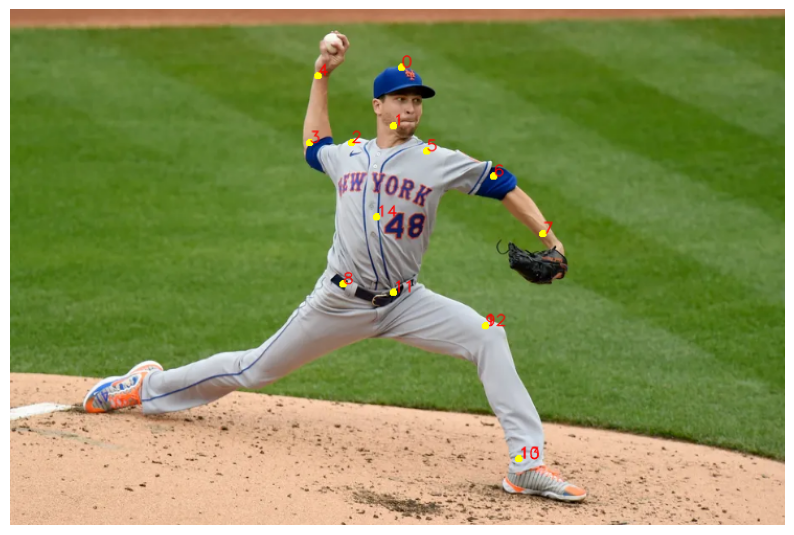

In [18]:
import matplotlib.pyplot as plt

# 키포인트 검출시 이미지에 그려줌
points = []
for i in range(0,15):
    # 해당 신체부위 신뢰도 얻음.
    probMap = output[0, i, :, :]
 
    # global 최대값 찾기
    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)

    # 원래 이미지에 맞게 점 위치 변경
    x = (imageWidth * point[0]) / W
    y = (imageHeight * point[1]) / H

    # 키포인트 검출한 결과가 0.1보다 크면(검출한곳이 위 BODY_PARTS랑 맞는 부위면) points에 추가, 검출했는데 부위가 없으면 None으로    
    if prob > 0.1 :    
        cv2.circle(image, (int(x), int(y)), 3, (0, 255, 255), thickness=-1, lineType=cv2.FILLED)       # circle(그릴곳, 원의 중심, 반지름, 색)
        cv2.putText(image, "{}".format(i), (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, lineType=cv2.LINE_AA)
        points.append((int(x), int(y)))
    else :
        points.append(None)

plt.figure(figsize=[10,10])
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')   # x, y축 숫자 제거
plt.show()

In [19]:
import sys
print(sys.executable)

c:\ProgramData\anaconda3\envs\PitchingTrack\python.exe


In [20]:
# 이미지 복사
imageCopy = image

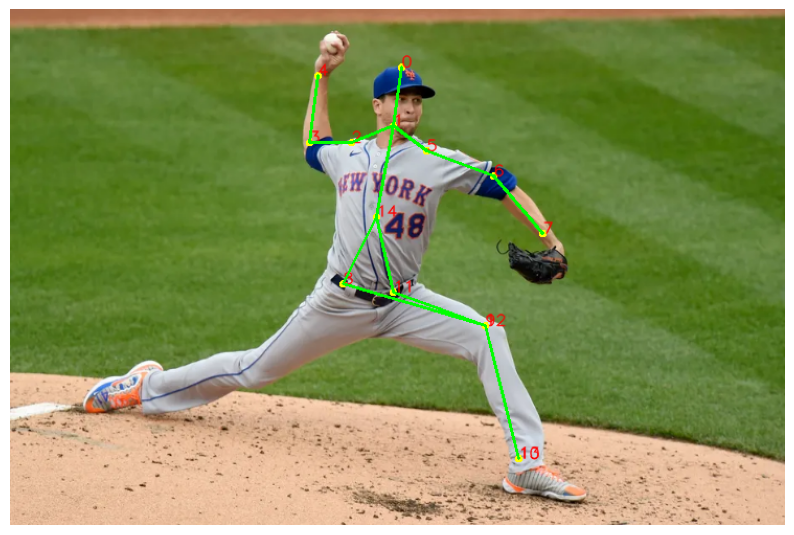

In [21]:
# 각 POSE_PAIRS별로 선 그어줌 (머리 - 목, 목 - 왼쪽어깨, ...)
for pair in POSE_PAIRS:
    partA = pair[0]             # Head
    partA = BODY_PARTS[partA]   # 0
    partB = pair[1]             # Neck
    partB = BODY_PARTS[partB]   # 1
    
    #print(partA," 와 ", partB, " 연결\n")
    if points[partA] and points[partB]:
        cv2.line(imageCopy, points[partA], points[partB], (0, 255, 0), 2)


plt.figure(figsize=[10,10])
plt.imshow(cv2.cvtColor(imageCopy, cv2.COLOR_BGR2RGB))
plt.axis('off')   # x, y축 숫자 제거
plt.show()